## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [16]:
import pandas as pd

drinks_df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [17]:
drinks_df = drinks_df.drop("total_litres_of_pure_alcohol", axis = 1)

drinks_df_tidy = drinks_df.melt(
    id_vars=['country'],
    var_name="drink",
    value_name="servings"
)
drinks_df_tidy

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

In [26]:
drinks_df_tidy["drink"] = drinks_df_tidy["drink"].apply(lambda text : text.split("_")[0])

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Who drinks the most beer?

In [39]:
top_10_beer_countries = drinks_df_tidy[drinks_df_tidy['drink'] == "beer"].sort_values(by = "servings", ascending=False).head(10)


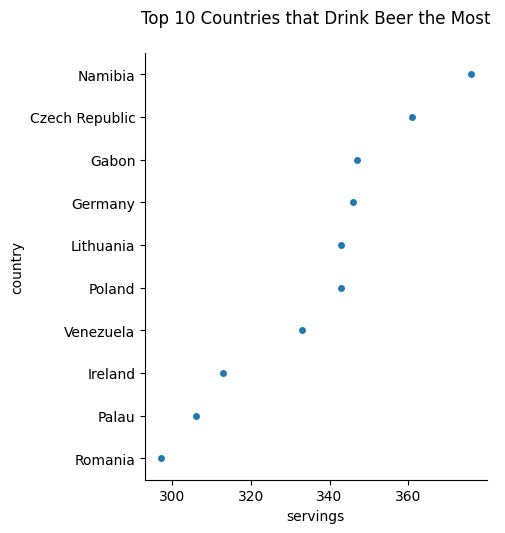

In [47]:
sns.catplot(
    data = top_10_beer_countries,
    x = "servings",
    y = "country",
    kind = "strip"
)
plt.title("Top 10 Countries that Drink Beer the Most", y = 1.05)
plt.show()

Who drinks the most wine?

In [56]:
top_10_wine_countries = drinks_df_tidy[drinks_df_tidy["drink"] == "wine"].sort_values(by = "servings", ascending=False).head(10)

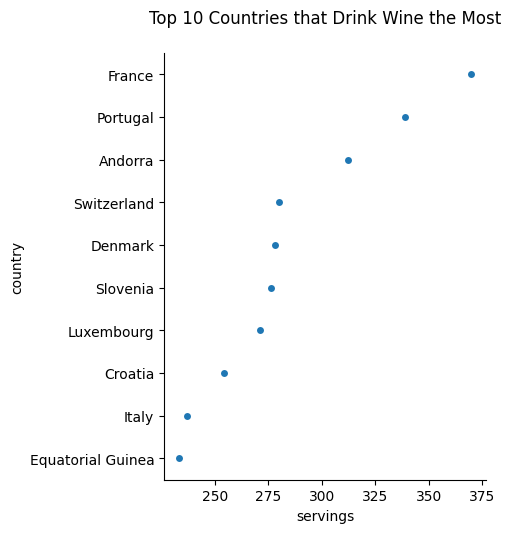

In [61]:
sns.catplot(
    data = top_10_wine_countries,
    x = "servings",
    y = "country",
    kind = "strip"
)
plt.title("Top 10 Countries that Drink Wine the Most", y = 1.05)
plt.show()

Who drinks spirit the most?

In [68]:
top_10_spirit_countries = drinks_df_tidy[drinks_df_tidy["drink"] == "spirit"].sort_values(by = "servings", ascending = False).head(10)

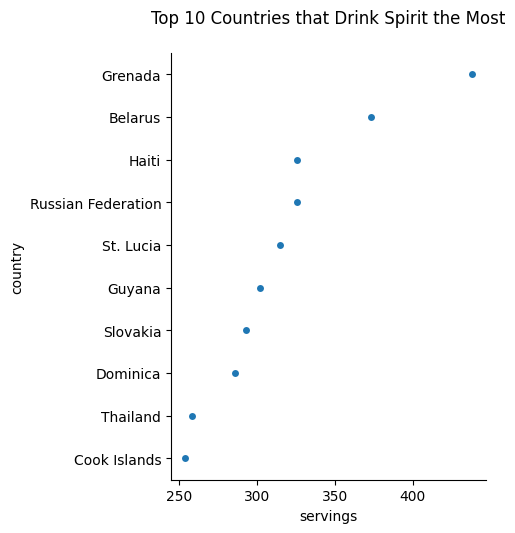

In [70]:
sns.catplot(
    data = top_10_spirit_countries,
    x = "servings",
    y = "country",
    kind = "strip"
)
plt.title("Top 10 Countries that Drink Spirit the Most", y = 1.05)
plt.show()

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

A wide dataframe that summarizes the total alcohol (spirit, beer, wine) consumption for each country.

In [78]:
pd.pivot_table(drinks_df_tidy, values="servings", columns="country", aggfunc='sum')

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
servings,0,275,39,695,319,275,439,211,545,545,...,156,540,370,134,50,436,114,6,55,86
